In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from google.colab import drive
import ee
import geemap.foliumap as geemap

In [2]:
ee.Authenticate()
ee.Initialize(project="215656163750")
drive.mount('/content/drive')
path = "/content/drive/MyDrive/CAFO_data/forTraining/interim_files/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Specify the dataset to be examined. This notebook is set up to examine and
# save a cleaned version of one dataset at a time

dataset_name = "Mexico"
df = pd.read_pickle(path+dataset_name+'_bldgs.pkl')

There are 1207 not-farms in the Mexico dataset
Will inspect 34 not-farms with area > 4000 sq m
 ...and...
130 not-farms with area > 1000 sq m and aspect ratio > 5


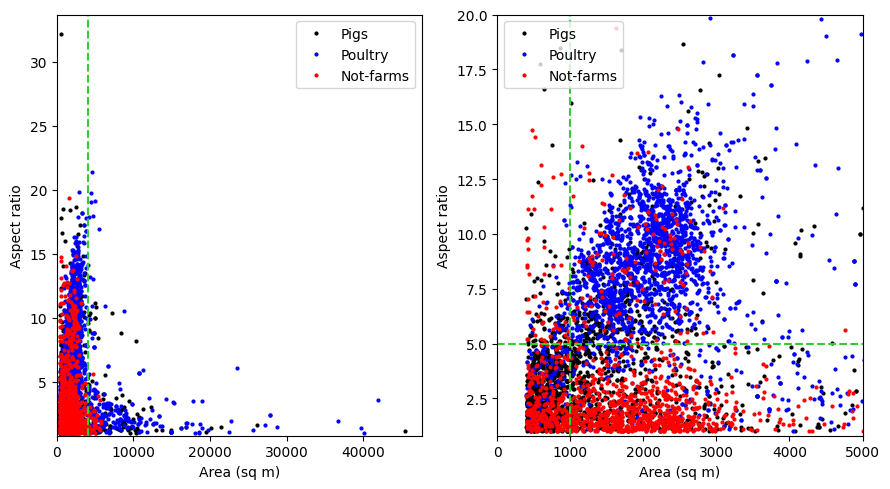

In [4]:
# Define the spaces in the diagram that needs closer inspection

spaces = ([4000], [1000, 5])

pigs = df[df["Farm type"] == "Pig"]
poultry = df[df["Farm type"].isin(["Poultry", "Layer", "Broiler"])]
nf = df[df["Farm type"] == "Non-farm"]

_, axes = plt.subplots(1, 2, figsize=(9, 5))

show_all = [(0, None), (0.8, None)]
zoom_in = [(0, 5000), (0.8, 20)]
for ax, lims, inspect in zip(axes, [show_all, zoom_in], spaces):

  ax.plot(pigs['Area (sq m)'], pigs['Aspect ratio'], 'ko', ms=2, label="Pigs")
  ax.plot(poultry['Area (sq m)'], poultry['Aspect ratio'], 'bo', ms=2,\
         label="Poultry")
  ax.plot(nf['Area (sq m)'], nf['Aspect ratio'], 'ro', ms=2, label="Not-farms")
  ax.legend()
  ax.axvline(inspect[0], color='limegreen', ls='--')
  if len(inspect) > 1:
    ax.axhline(inspect[1], color='limegreen', ls='--')
  ax.set_xlabel('Area (sq m)')
  ax.set_ylabel('Aspect ratio')

  ax.set_xlim(lims[0])
  ax.set_ylim(lims[1])

plt.tight_layout()

check_1 = nf[nf["Area (sq m)"] > spaces[0][0]]
check_2 = nf[(nf["Area (sq m)"] > spaces[1][0]) & (nf["Aspect ratio"] > spaces[1][1])]

print(f"There are {len(nf)} not-farms in the {dataset_name} dataset")
print(f"Will inspect {len(check_1)} not-farms with area > {spaces[0][0]} sq m")
print(" ...and...")
print(f"{len(check_2)} not-farms with area > {spaces[1][0]} sq m and aspect\
 ratio > {spaces[1][1]}")

In [5]:
# This function loops over all the non-farms in the questionable part of the
# diagram. It shows each one in turn on a map. Type <keep> to retain the
# not-farm (if it doesn't look like a CAFO), or <reject> to reject the not-farm
#(if it does appear to be a CAFO)


def loop_over_buildings(to_check):
  os.environ["HYBRID"] = 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}'

  viz = {
      'color': 'yellow',
      'width': 2,
      'fillColor': '00000000'
  }

  false_positives = []
  for n in range(len(to_check)):
    feature = gpd.GeoDataFrame(to_check.iloc[n]).T.set_geometry('geometry')\
                                .set_crs("EPSG:4326")

    print(f"Working on feature {n} of {len(to_check)}")
    display(feature)
    fc = geemap.geopandas_to_ee(feature[['geometry']])

    Map = geemap.Map()
    Map.centerObject(fc.first().geometry(), 17)
    Map.add_basemap("HYBRID")
    Map.addLayer(fc, viz, "Not-farms")
    display(Map)

    response = input("Enter keep to keep, reject to reject, exit to exit  ")
    if response == 'reject':
      false_positives.append(feature.index[0])
    if response == 'exit':
      break

  return false_positives

In [6]:
false_pos_1 = []
false_pos_1 = loop_over_buildings(check_1)

Working on feature 0 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
4010,"POLYGON ((-99.51972 27.45906, -99.52101 27.459...",5613.2623,142.801668,3.568388,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 1 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3994,"POLYGON ((-116.01874 30.71550, -116.01891 30.7...",5105.0717,89.278238,1.482628,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 2 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
4009,"POLYGON ((-107.45910 24.56649, -107.45910 24.5...",5442.8277,103.836977,1.350115,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 3 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3989,"POLYGON ((-99.47287 18.73990, -99.47285 18.739...",5170.4939,117.106089,2.449283,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 4 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3957,"POLYGON ((-103.36616 25.47407, -103.36622 25.4...",4740.6585,93.442294,1.332171,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 5 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3967,"POLYGON ((-89.70455 20.94507, -89.70467 20.945...",5030.5872,101.296083,1.822113,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 6 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3909,"POLYGON ((-106.09190 28.67695, -106.09221 28.6...",4123.2961,123.975563,2.177052,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 7 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3987,"POLYGON ((-98.07332 19.77787, -98.07326 19.777...",5122.2237,88.782876,1.445357,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 8 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3976,"POLYGON ((-102.53260 19.53602, -102.53262 19.5...",4876.4156,93.745173,1.618275,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 9 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3953,"POLYGON ((-110.94499 31.27202, -110.94501 31.2...",4798.8042,121.963171,2.715692,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 10 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
4012,"POLYGON ((-103.54534 20.22010, -103.54621 20.2...",5790.170898,102.585387,1.789798,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 11 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3919,"POLYGON ((-97.37743 18.45210, -97.37783 18.452...",4306.5057,85.005619,1.022254,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 12 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3955,"POLYGON ((-106.37645 30.02103, -106.37682 30.0...",4756.123535,176.048069,5.617773,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 13 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3927,"POLYGON ((-103.36232 25.59911, -103.36197 25.5...",4365.8385,124.16545,3.017655,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 14 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3959,"POLYGON ((-106.92853 28.39954, -106.92852 28.3...",4815.3835,119.072053,2.833929,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 15 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3911,"POLYGON ((-103.44439 20.31770, -103.44472 20.3...",4222.0358,100.577248,1.590096,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 16 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3895,"POLYGON ((-101.60914 19.51640, -101.60955 19.5...",4052.707764,89.006838,1.340097,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 17 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3983,"POLYGON ((-103.93064 20.69569, -103.93064 20.6...",5041.87207,111.201816,1.998036,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 18 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3979,"POLYGON ((-116.15746 30.95018, -116.15802 30.9...",4923.5987,107.573785,2.163513,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 19 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
4018,"POLYGON ((-103.44192 20.64152, -103.44187 20.6...",5811.8451,112.449019,1.950697,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 20 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
4007,"POLYGON ((-106.88436 23.87627, -106.88435 23.8...",5602.2039,85.35124,1.207971,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 21 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3928,"POLYGON ((-101.52832 20.54870, -101.52831 20.5...",4281.7576,105.474618,2.536089,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 22 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3913,"POLYGON ((-116.15560 30.94885, -116.15616 30.9...",4204.564453,107.607557,2.419892,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 23 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3966,"POLYGON ((-97.28174 18.37836, -97.28170 18.378...",4855.1496,99.17921,1.944409,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 24 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3952,"POLYGON ((-116.22705 30.99172, -116.22698 30.9...",4730.6346,80.170542,1.217644,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 25 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3941,"POLYGON ((-102.14191 19.91372, -102.14191 19.9...",4475.2808,91.377767,1.336622,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 26 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3922,"POLYGON ((-99.85114 18.96527, -99.85118 18.965...",4262.2067,77.5318,1.00157,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 27 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
4002,"POLYGON ((-101.72475 22.61780, -101.72509 22.6...",5318.6781,144.149004,3.902713,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 28 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3992,"POLYGON ((-103.92974 20.72182, -103.93055 20.7...",5072.1785,86.000804,1.459486,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 29 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3946,"POLYGON ((-109.87765 27.35536, -109.87764 27.3...",4577.544434,98.848556,2.148899,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 30 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3888,"POLYGON ((-99.53816 19.29549, -99.53800 19.295...",4042.741943,87.347179,1.531398,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 31 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3975,"POLYGON ((-100.11428 25.60109, -100.11424 25.6...",4874.173828,122.962066,2.758347,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 32 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
3980,"POLYGON ((-101.40814 20.68714, -101.40811 20.6...",5009.6907,76.1788,1.016882,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep
Working on feature 33 of 34


,geometry,Area (sq m),Length (m),Aspect ratio,Parent coords,Farm type,Number of animals,Dataset name
4005,"POLYGON ((-101.00968 22.19010, -101.00989 22.1...",5541.9392,88.667522,1.391718,None,Non-farm,NaN,Mexico


Enter keep to keep, reject to reject, exit to exit  keep


In [7]:
false_pos_2 = []
false_pos_2 = loop_over_buildings(check_2)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
# Remove the false positives from the non-farm dataset
false_positives = false_pos_1 + false_pos_2
nf_cleaned = nf.drop(false_positives)
print(f'Dropped {len(false_positives)} false positives from the not-farm dataset')
print(f"There are now {len(nf)} not-farms in the training dataset")

# Create a new DF containing them, with Farm type = Unknown CAFO as I don't
# have farm labels for these
new_cafos = nf.loc[false_positives, :]
new_cafos.loc[:, "Farm type"] = "Unknown CAFO"

# Combine and save the original pig, poultry, cleaned not-farm, and new
# unknown-CAFO dfs
updated = pd.concat([pigs, poultry, nf_cleaned, new_cafos])

save_to = f"{path}{dataset_name}_bldgs_cleaned.pkl"
print(f"Saving cleaned file to {save_to}")
updated.to_pickle(f'{save_to}')

75
Dropped 75 false positives from the not-farm dataset
There are now 1207 not-farms in the training dataset
Saving cleaned file to /content/drive/MyDrive/CAFO_data/forTraining/interim_files/Mexico_bldgs_cleaned.pkl
